# Load and Visualize Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv('data/bank-additional-full.csv',sep=';',)

In [3]:
df.info() # no missing values for all the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe() # basic descriptive statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df['y'] = df['y'].map({'no':0, 'yes':1}) # binary encoding of class label

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f652e13fe48>,
      dtype=object)

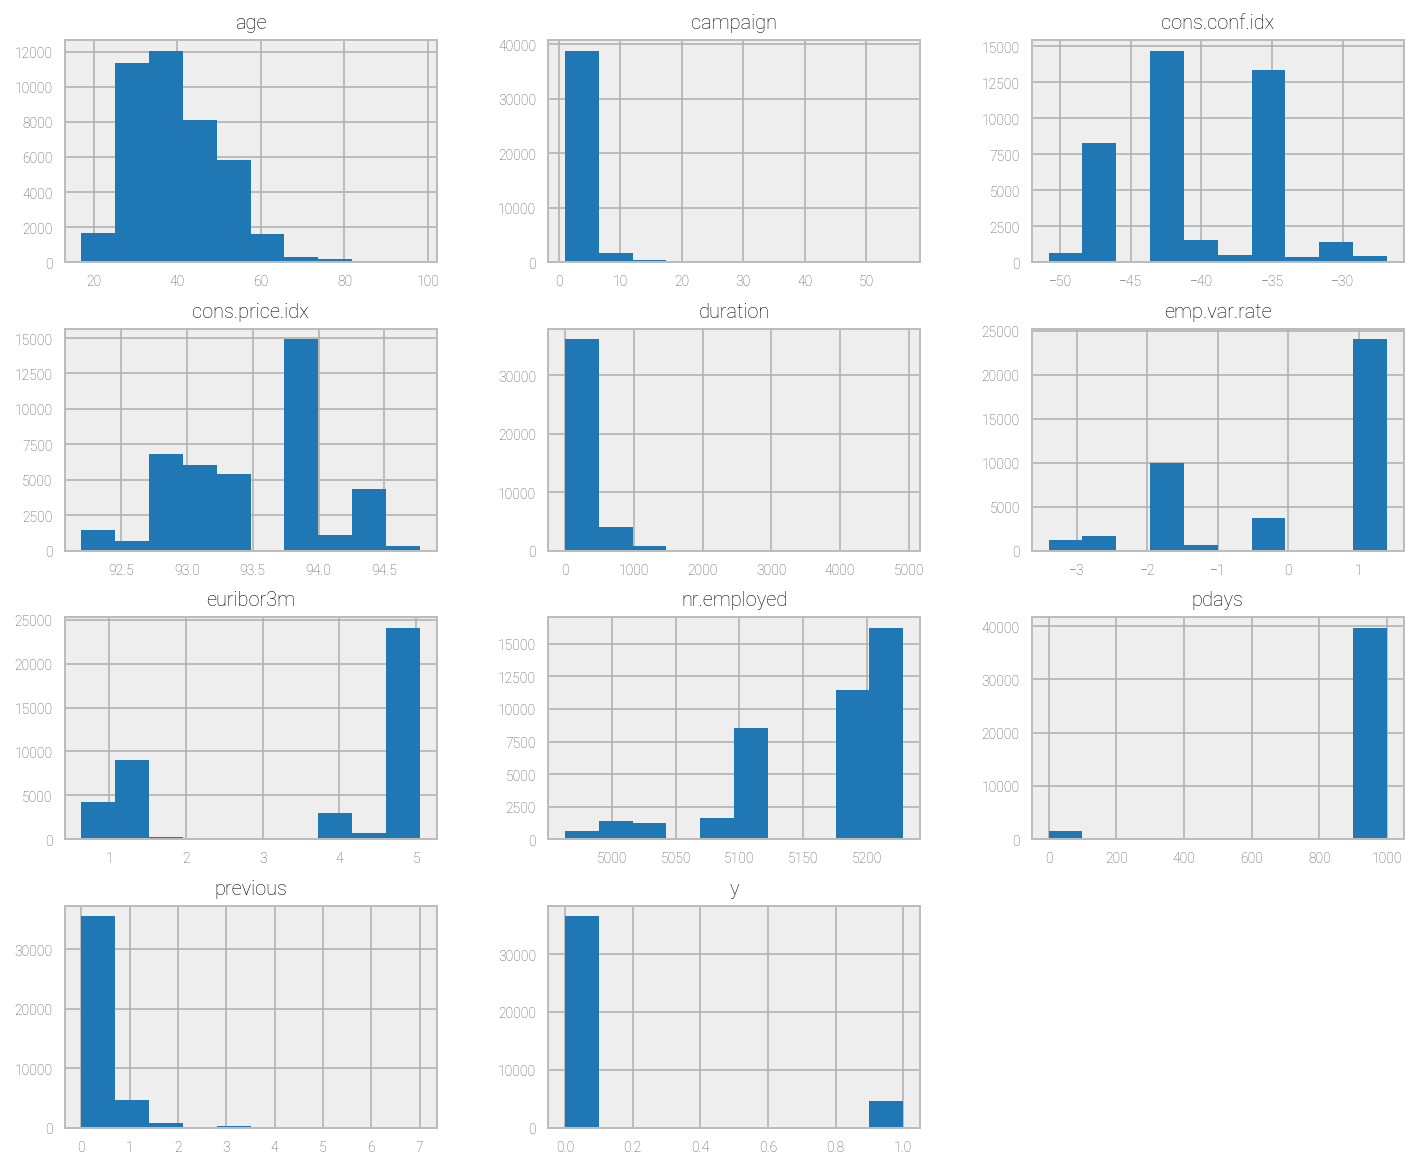

In [7]:
df.hist(figsize=(12,10)) # display numerical feature distribution

In [8]:
df['y'].value_counts() # dataset is imbalanced with majority of class label as "no".

0    36548
1     4640
Name: y, dtype: int64

In [9]:
# dataset is imbalanced with majority of class label as "no".
df['y'].value_counts()/len(df)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [10]:
df.corr() # correlation matrix analysis to show r2 value

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f652549cd68>,
      dtype=object)

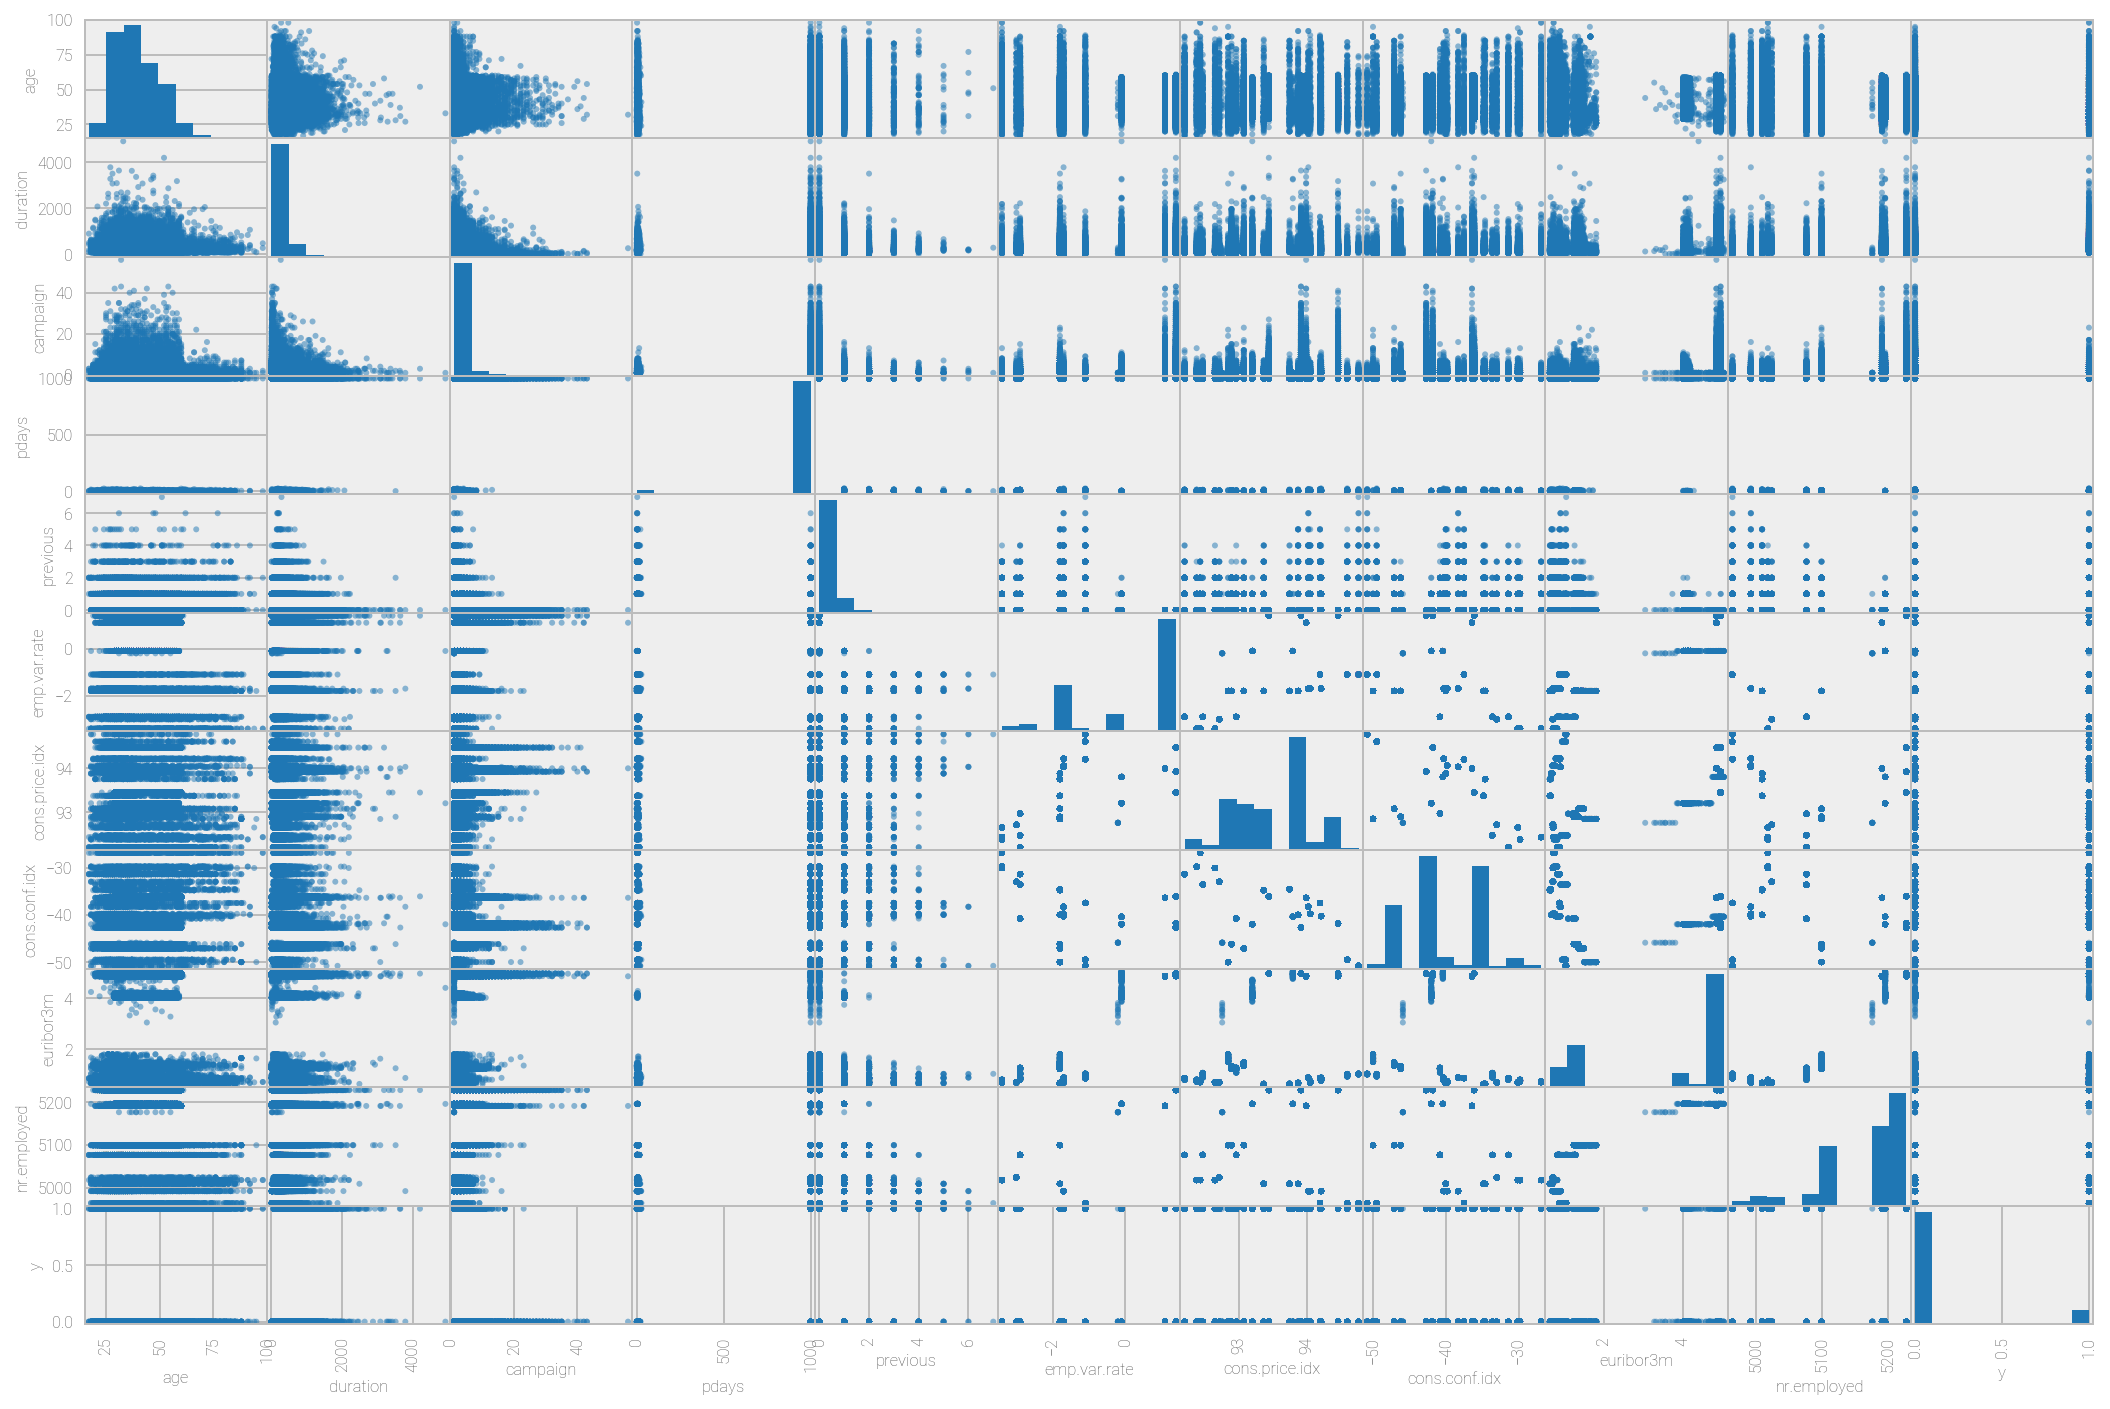

In [11]:
# scatter matrix visualization
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(18,12))

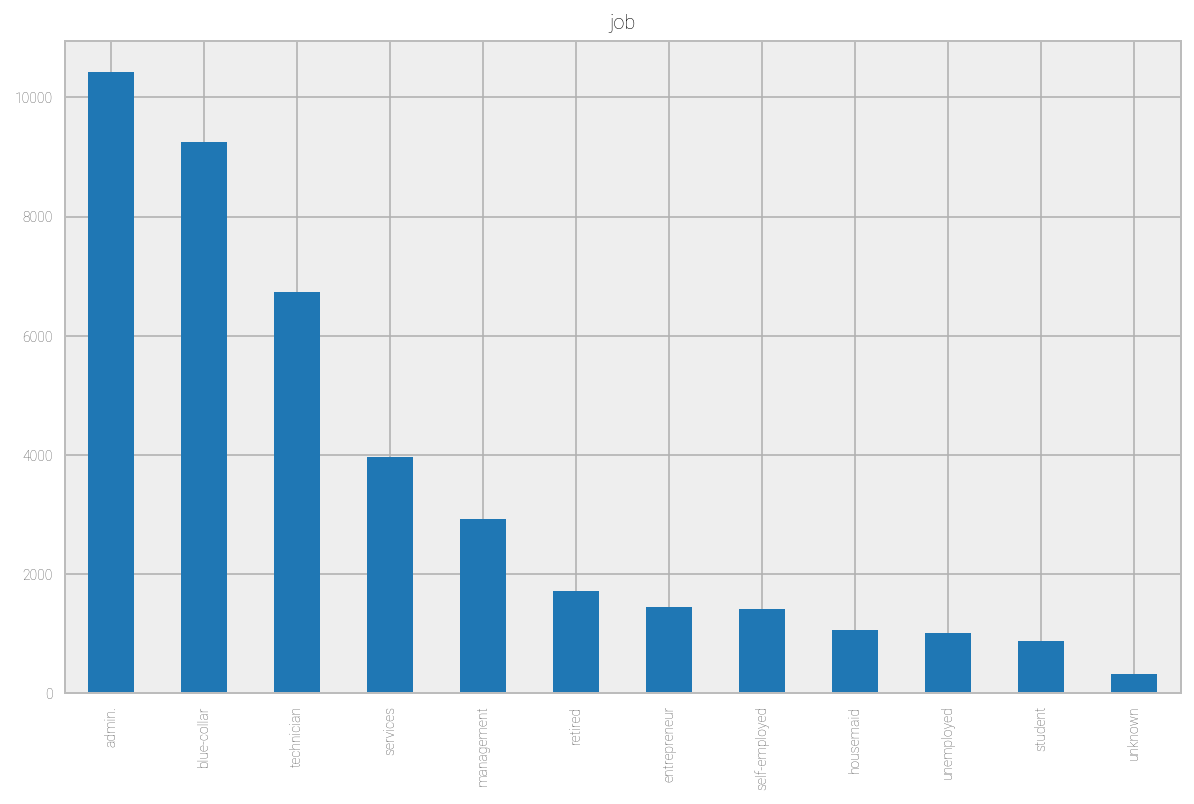

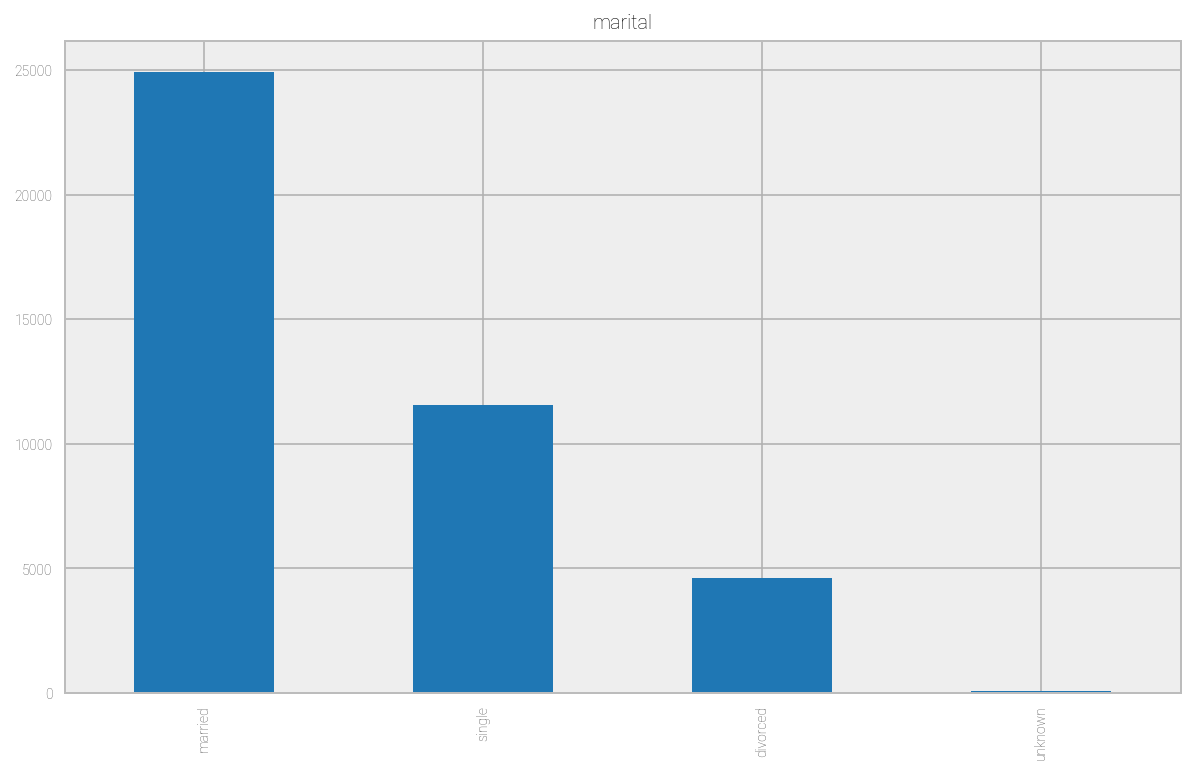

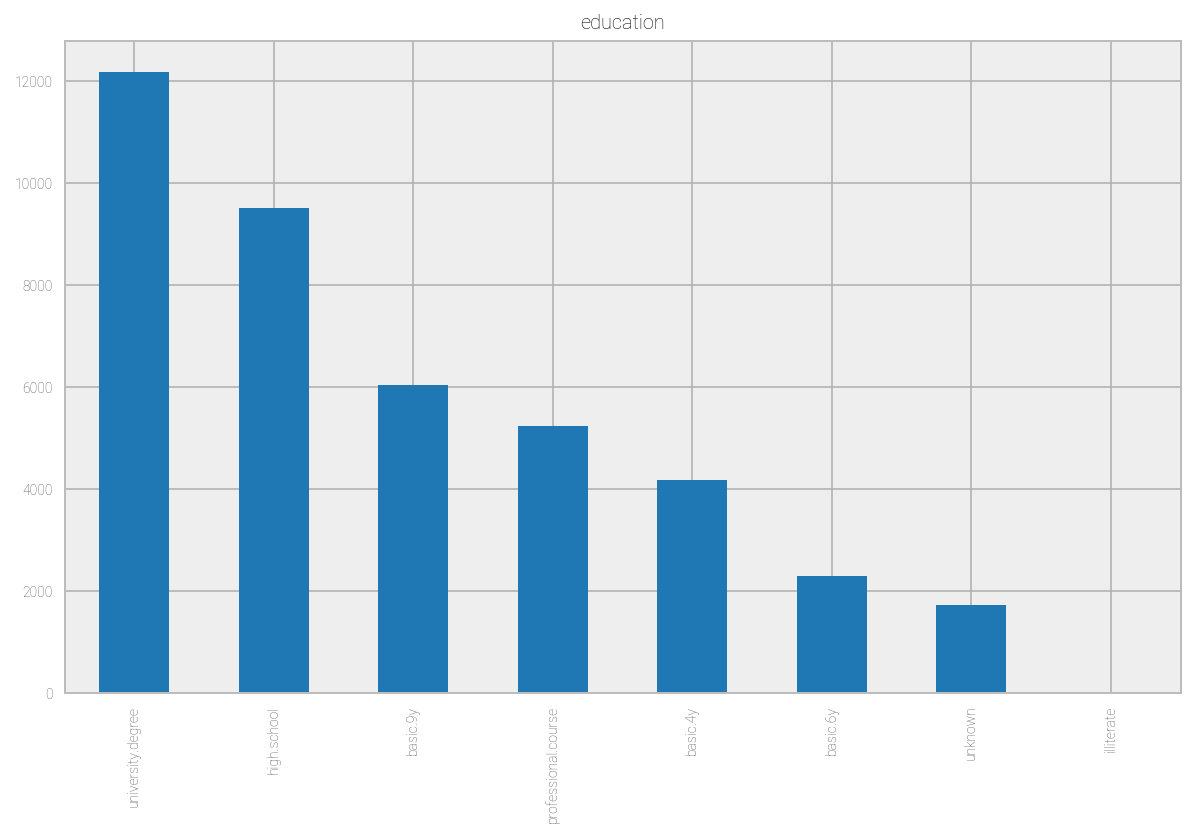

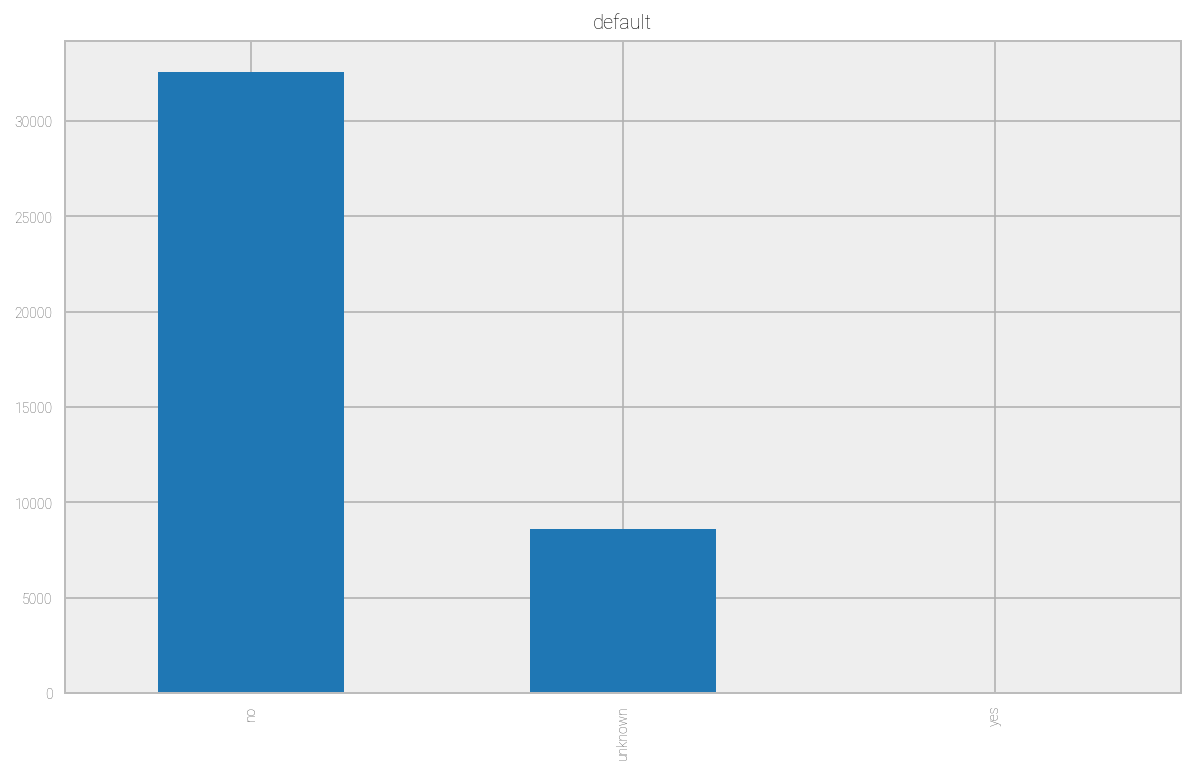

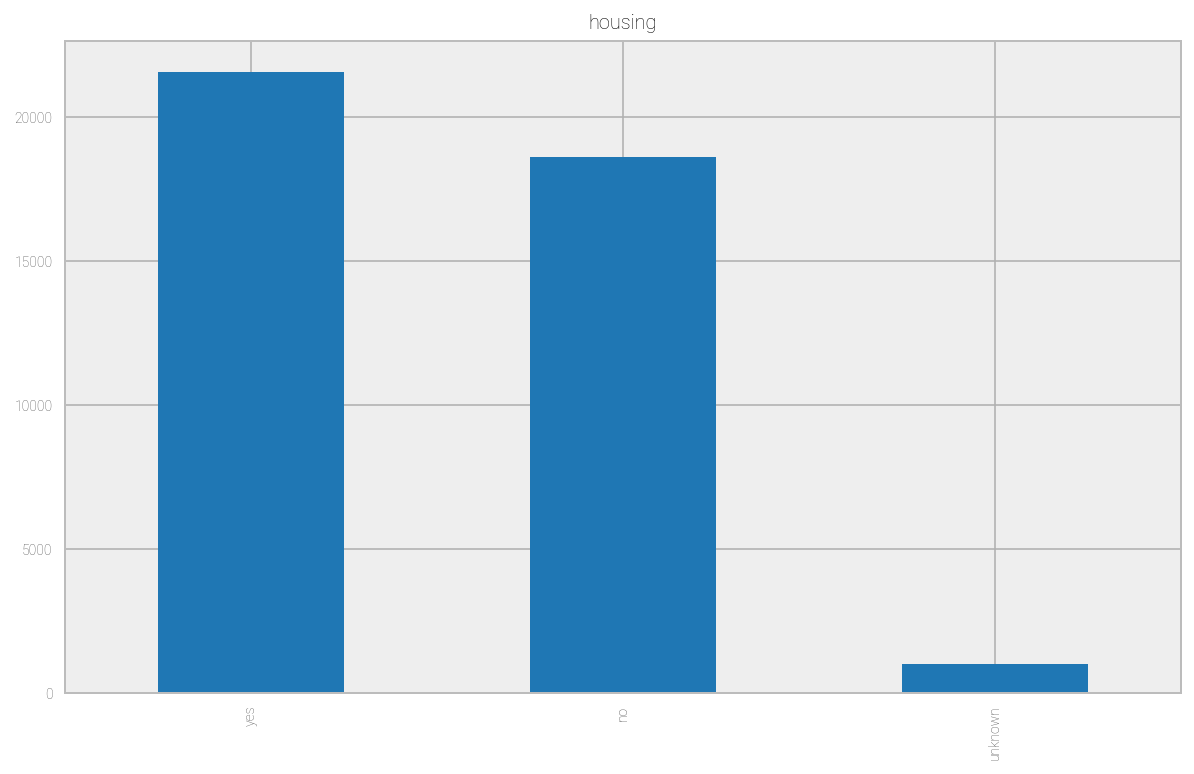

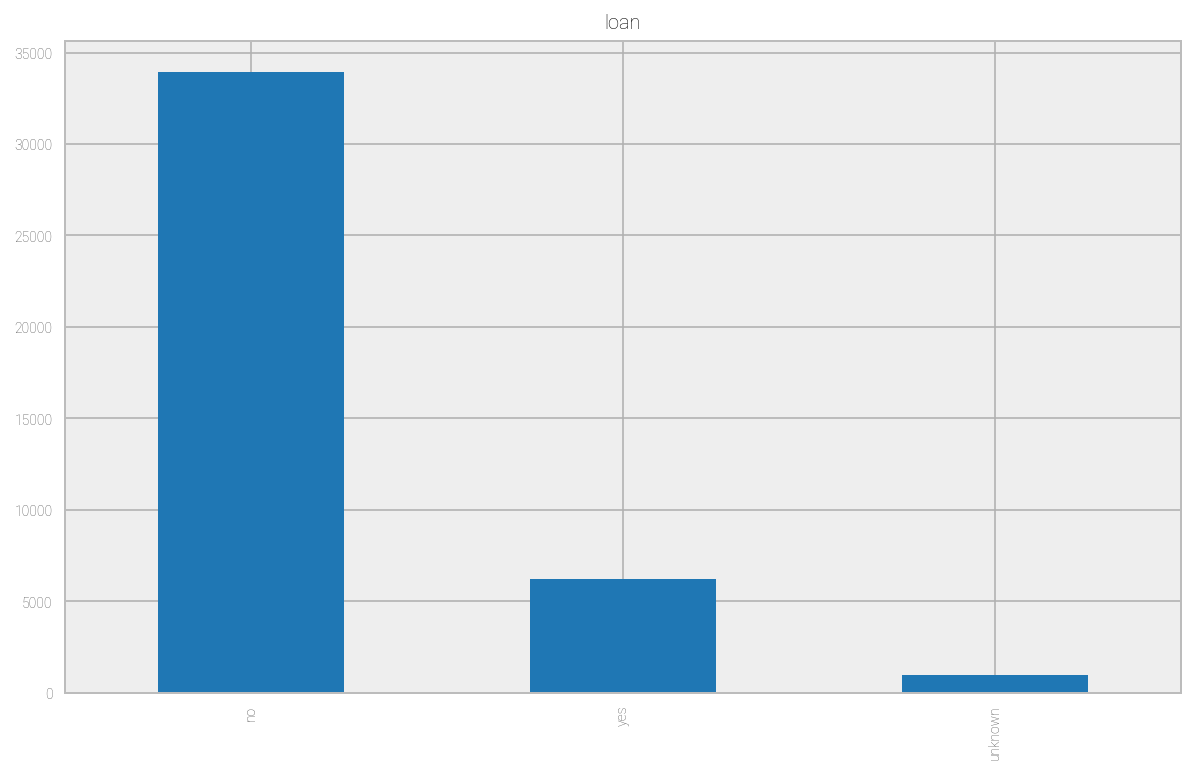

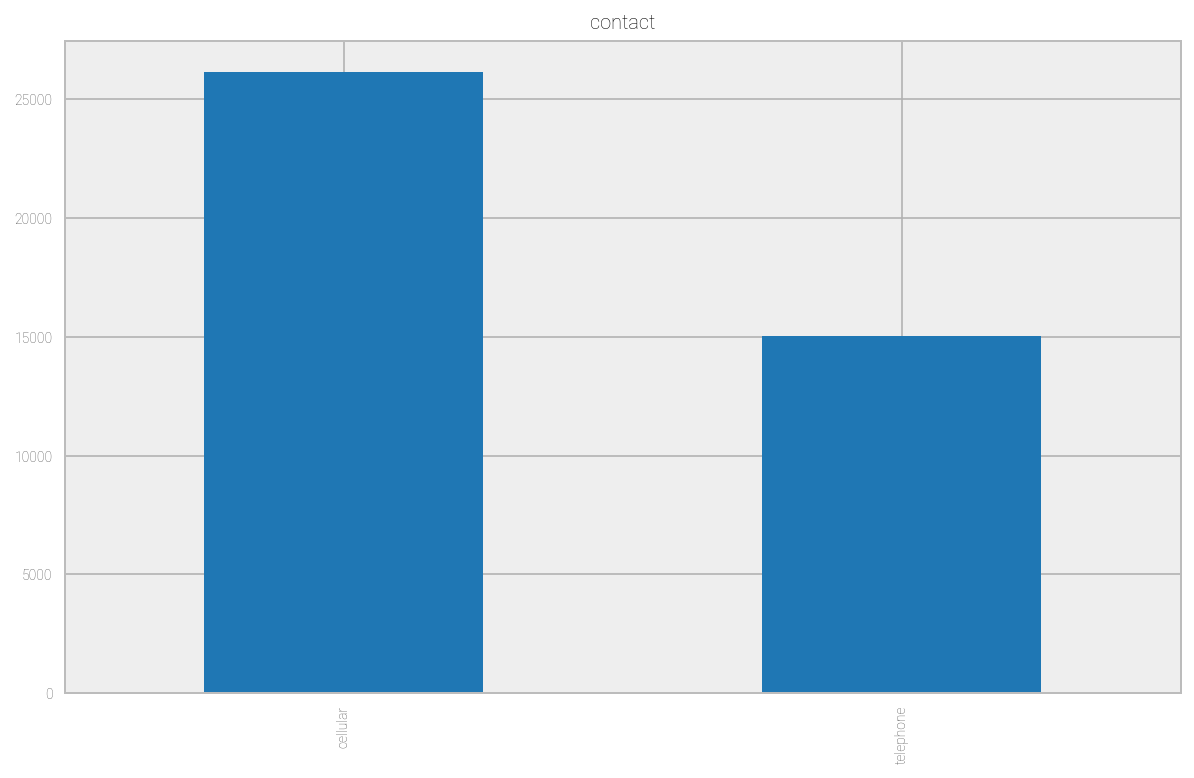

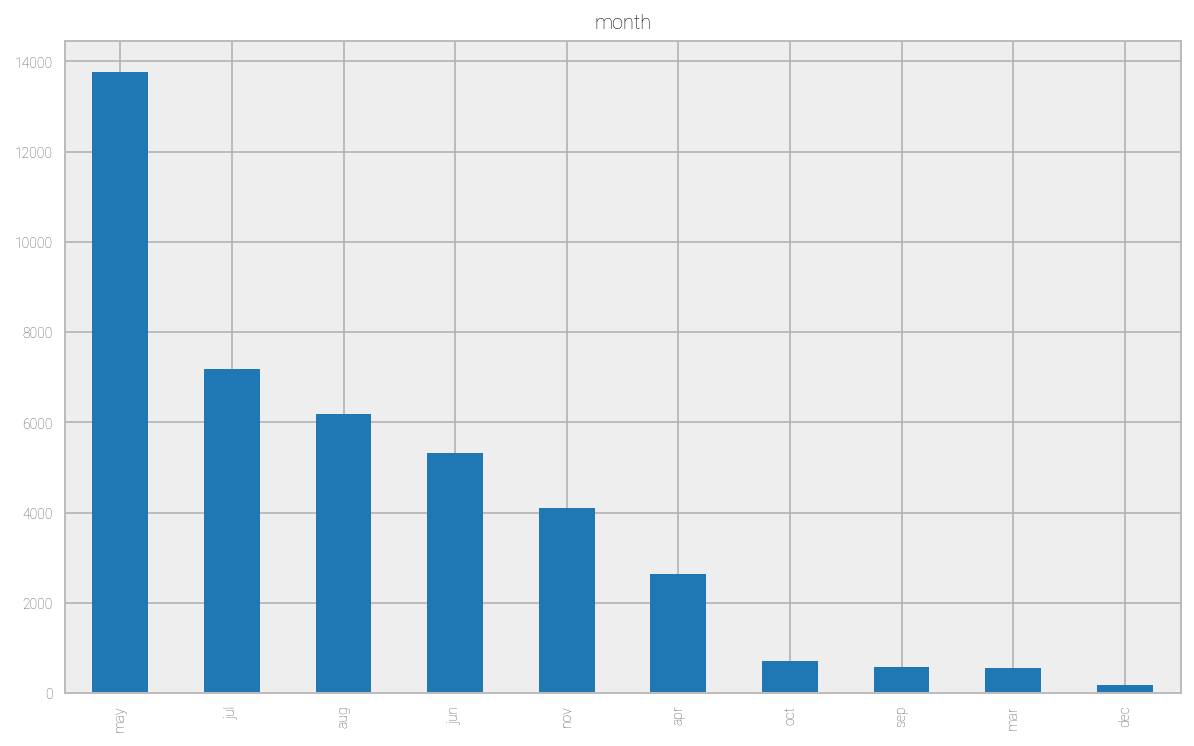

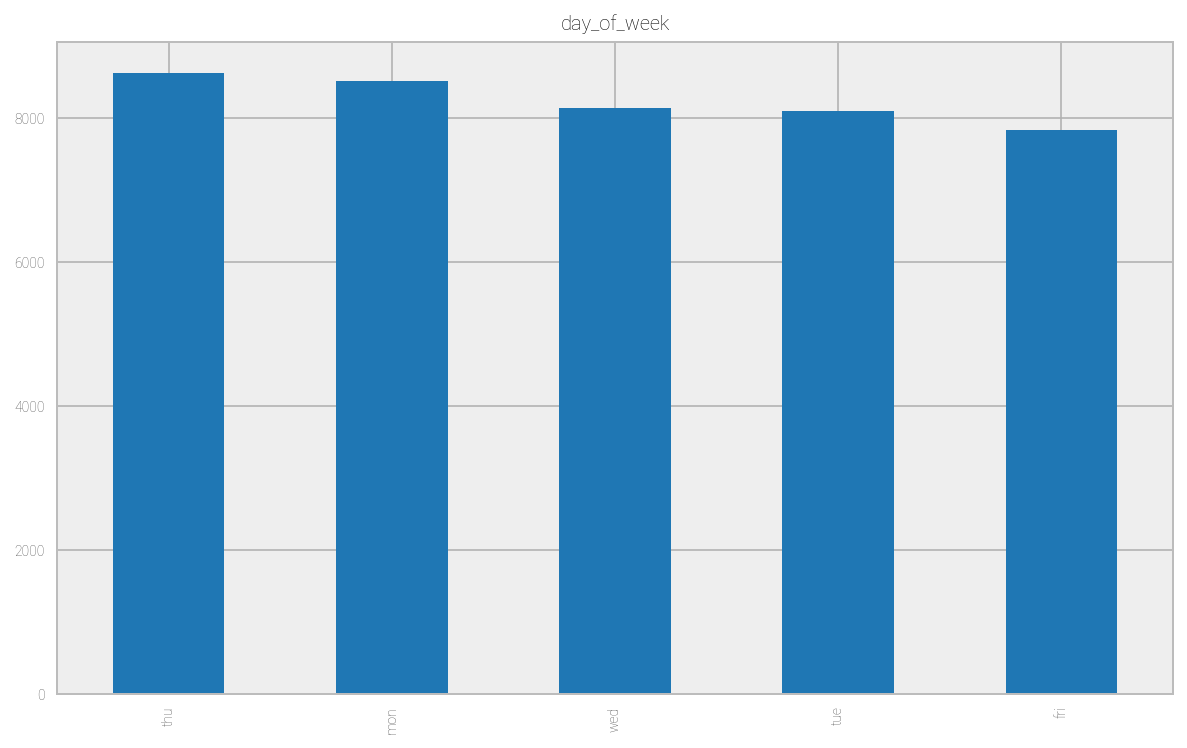

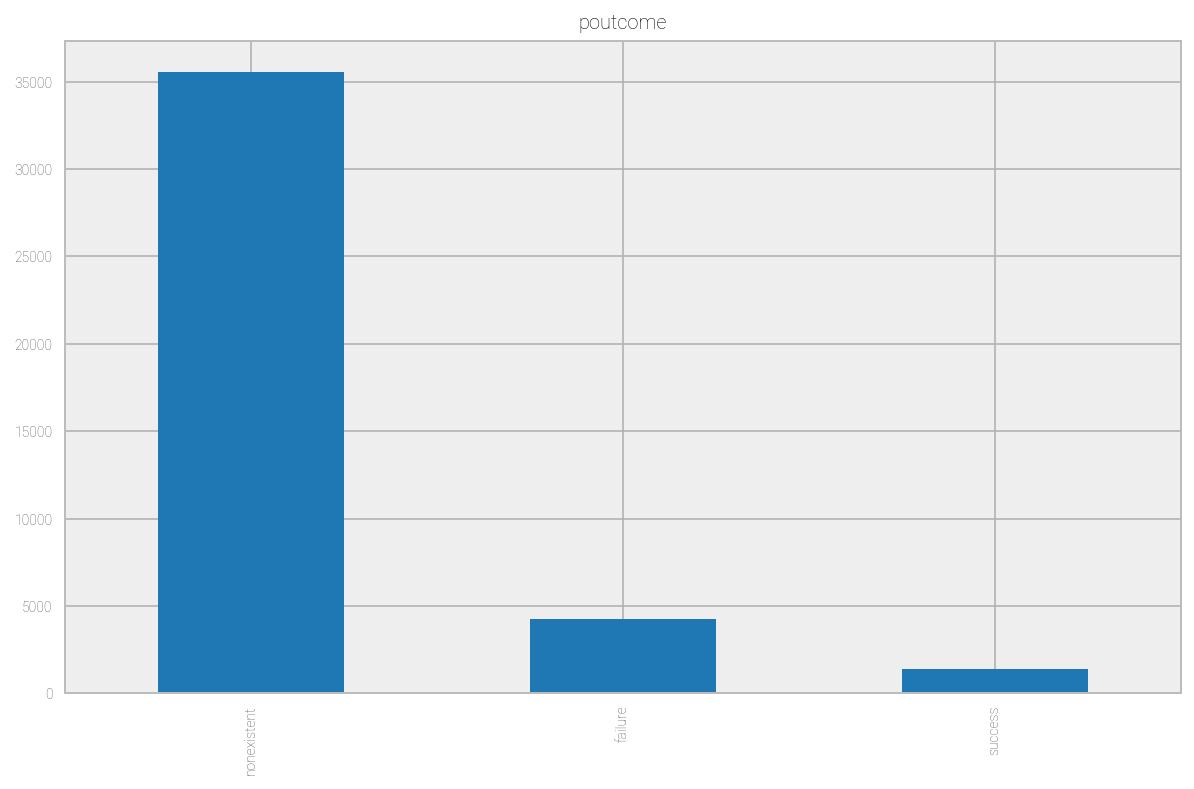

In [12]:
# visualize categorical features
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in categorical:
    df[i].value_counts().plot(kind='bar',figsize = (10, 6),title=i)
    plt.show()

# Data Preprocessing

In [13]:
# perform feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

df[numerical] = scaler.fit_transform(df[numerical])

In [14]:
df_new = pd.get_dummies(df)
df_new = df_new.drop('duration', axis=1)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null float64
campaign                         41188 non-null float64
pdays                            41188 non-null float64
previous                         41188 non-null float64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-

In [16]:
import random
random.seed(3434200)

# split train/validation and test set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=18)
for train_index, test_index in split.split(df_new, df_new['y']):
    train_set = df_new.loc[train_index]
    test_set = df_new.loc[test_index]

In [17]:
train_set['y'].value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [18]:
# make sure negative class is distributed equally in train and test set.
train_set['y'].value_counts()/len(train_set)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [19]:
test_set['y'].value_counts()/len(test_set)

0    0.887351
1    0.112649
Name: y, dtype: float64

In [20]:
# perform upsampling to address sample imbalance
from sklearn.utils import resample
# Separate majority and minority classes
train_negative = train_set[train_set['y']==0]
train_positive = train_set[train_set['y']==1]
 
# Upsample minority class
train_positive_upsample = resample(train_positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=29238,    # to match majority class
                                 random_state=18) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsample = pd.concat([train_negative, train_positive_upsample])
 
# Display new class counts
train_upsample['y'].value_counts()

1    29238
0    29238
Name: y, dtype: int64

In [21]:
# create X, y for upsampled training and testing
X_train = train_upsample.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)
y_train = train_upsample['y']
y_test = test_set['y']

In [22]:
# create X, y for imbalanced train set used for performance validation
X_imb = train_set.drop('y', axis=1)
y_imb = train_set['y']

# Define Model and Plotting Functions

In [23]:
# create function to fit classifier using GridsearchCV and report metrics score on train dataset
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    # Perform grid search on the classifier using scorer_metrics as the scoring method
    grid_obj = GridSearchCV(estimator = model, param_grid = parameters, scoring=make_scorer(scorer_metrics), cv=10)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X, y)

    # Get the estimator
    model_estimator = grid_fit.best_estimator_

    # Report the metrics scores on train data
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

In [24]:
# create function to use fitted model to report metrics score on test dataset
# return predicted classification on test dataset
def classifier_test(model_fit, X, y):
    y_pred = model_fit.predict(X)
    print("\n")
    print("\nModel performance on test set\n------------------------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on testing data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on testing data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y, y_pred)))
    return y_pred

In [25]:
# create function to plot ROC curve
from sklearn.metrics import roc_curve

def roc_curve_plot(model, X, y,label=None):
    # make sure positive class prediction is in the second column of binary prediction
    if label=='Neural Network':
        y_score = model.predict_proba(X)[:,0]
    else:
        y_score = model.predict_proba(X)[:,1]
    
    # generate ROC curve data
    roc = roc_curve(y, y_score)
    
    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    roc_score = auc(roc[0],roc[1])
    print('AUC score of %s is %.4f.' % (label, roc_score))

In [26]:
# create function to generate the data inputs for Lift plot. Return the lists for accumulative lift,
# population accumulative, and descending predicted probability list
def lift_input(model, X, y, model_name=None):
    # extract the positive probability prediction
    if model_name == 'Neural Network':
        proba_pos = model.predict_proba(X)[:,0]
    else:
        proba_pos = model.predict_proba(X)[:,1]
    # create np.array of positive class label
    actual_pos = np.array(list(y))
    
    # reshape the numpy arrays to (dim, 1) and join the predicted and actual class label to generate 2D array
    joint = np.concatenate([proba_pos.reshape(proba_pos.shape[0],1), actual_pos.reshape(actual_pos.shape[0],1)], 
                           axis=1)
    
    # sort 2D array in ascending order by the column of predicted class probability
    joint_sort=np.sort(joint.view('i8,i8'), order=['f0'], axis=0).view(np.float)
    
    # calculate the number of total sample and positive class
    total_num = len(joint_sort)
    total_positive = sum(joint_sort[:,1]==1)

    # create reverse order of actual class label and result in the order from high to low probability
    positive_reverse = joint_sort[:,1][::-1]
    
    # reverse order of predicted probability in the order from high to low
    # will be used for identifying customarized probability threshold in y_predict_threshold function
    pred_proba_descending = joint_sort[:,0][::-1] 

    # create cumulative response%
    positive_cumulative = 0
    positive_cumulative_list = [0]
    for i in range(len(joint_sort)):
        positive_cumulative = positive_cumulative + positive_reverse[i]/total_positive
        positive_cumulative_list.append(positive_cumulative)
        
    # create cumulative population %
    population_cumulative = 0
    population_cumulative_list = [0]
    for i in range(len(joint_sort)):
        population_cumulative = population_cumulative + i/total_num
        population_cumulative_list.append(i/total_num)
        
    return positive_cumulative_list, population_cumulative_list, pred_proba_descending

In [27]:
# create function to plot Lift chart
from sklearn.metrics import auc

def gain_plot(lift_input, label=None):
    plt.plot(lift_input[1], lift_input[0], label=label)
    plt.plot([0,1],[0,1], 'k--') # reference line for random model
    plt.axis([0,1,0,1])
    plt.xlabel('Population%')
    plt.ylabel('Subscribe%')
    # calculate area under curve
    AUC = auc(lift_input[1], lift_input[0], reorder=False)
    print('AUC score of %s is %.4f.' % (label, AUC))

In [28]:
# create function to calculate and plot lift gain. Return the list of lift gain.
def lift_chart(lift_input, label=None):
    lift_gain_list = []
    # set counter for probability close to 0 (can not be divided) 
    n = 0
    for i in range(0,len(lift_input[0])):
        # exclude 0 probability indices to avoid zero division problem
        if lift_input[1][i]==0:
            n+=1
            continue
        else:
            # calculate lift gain (%response or positive/%population)
            lift_gain_list.append(lift_input[0][i]/lift_input[1][i]) 

    plt.plot(lift_input[1][0:(len(lift_input[1])-n)], lift_gain_list, label=label)
    plt.plot([0,1],[1,1], 'k--') # reference line with no lift gain at all (=1)
    plt.axis([0,1,0,10])
    plt.xlabel('Population%')
    plt.ylabel('Lift Gain')
    return lift_gain_list

In [29]:
# create a function to predict clients likely to subscribe based on the probability threshold defined by
# the desired population% of the clients to be contacted
# top_percent is the desired population percentage for marketing contact, i.e., 0.2 = top 20%
def y_predict_threshold(model, X, y, top_percent, model_name=None):
    lift_input_model = lift_input(model, X, y, model_name=model_name)
    # get the indice of probility threshold meeting top_percent number
    idx = int(len(lift_input_model[2])*top_percent)
    # get the probility threshold for classification cutoff
    threshold_proba = lift_input_model[2][idx]
    
    # list of predicted probability
    if model_name == 'Neural Network':
        y_proba = model.predict_proba(X)[:,0]
    else:
        y_proba = model.predict_proba(X)[:,1]
        
    # 0,1 classification using threshold cutff
    y_predict = (y_proba>=threshold_proba).astype(int)
    return y_predict

# Define and Train Models

In [30]:
# Import metrics scores, GridSearchCV, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [31]:
# Naive Bayes model without GridserachCV
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
y_pred_GNB = model_GNB.predict(X_train)
print("\nGaussian Naive Bayes model on training set\n------------------------")
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, y_pred_GNB)))
print("Final precision score on training data: {:.4f}".format(precision_score(y_train, y_pred_GNB)))
print("Final Recall score on training data: {:.4f}".format(recall_score(y_train, y_pred_GNB)))
print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y_train, y_pred_GNB)))

# Report the metrics scores on test data
y_pred_test_GNB = model_GNB.predict(X_test)
print("\n")
print("\nGaussian Naive Bayes model on test set\n------------------------")
print("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, y_pred_test_GNB)))
print("Final Precision score on test data: {:.4f}".format(precision_score(y_test, y_pred_test_GNB)))
print("Final Recall score on test data: {:.4f}".format(recall_score(y_test, y_pred_test_GNB)))
print("Final ROC AUC score on test data: {:.4f}".format(roc_auc_score(y_test, y_pred_test_GNB)))
print("\n")


Gaussian Naive Bayes model on training set
------------------------
Final accuracy score on the training data: 0.7176
Final precision score on training data: 0.7388
Final Recall score on training data: 0.6730
Final ROC AUC score on training data: 0.7176



Gaussian Naive Bayes model on test set
------------------------
Final accuracy score on the test data: 0.7586
Final Precision score on test data: 0.2714
Final Recall score on test data: 0.6789
Final ROC AUC score on test data: 0.7238




In [32]:
import sklearn

In [33]:
sklearn.__version__

'0.21.0'

In [34]:
from sklearn.externals import joblib

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
joblib.dump(model_GNB, './saved_models/Gaussian_NB_model.pkl')

['./saved_models/Gaussian_NB_model.pkl']

In [36]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create the parameters list
parameters_DT = {'max_depth': [6,7,8],
                 'min_samples_leaf': [2,3],
                 'min_samples_split': [2,3]}

model_DT = fit_classifier(DecisionTreeClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_DT, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7483
Final precision score on training data: 0.8234
Final Recall score on training data: 0.6321
Final ROC AUC score on training data: 0.7483


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=18, splitter='best')


In [37]:
# Decision Tree model performance on test dataset
y_test_DT = classifier_test(model_DT, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.8383
Final precision score on testing data: 0.3692
Final Recall score on testing data: 0.6142
Final ROC AUC score on testing data: 0.7405


In [38]:
# save the model to current directory
joblib.dump(model_DT, './saved_models/Decision_Tree_model.pkl')

['./saved_models/Decision_Tree_model.pkl']

In [39]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create the parameters list
parameters_LR = {'C': [0.0006,0.0007, 0.0008], 'penalty': ['l1', 'l2']}

model_LR = fit_classifier(LogisticRegression(random_state=18), X_train, y_train, 
                          parameters=parameters_LR, scorer_metrics=recall_score)

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7165
Final precision score on training data: 0.7227
Final Recall score on training data: 0.7026
Final ROC AUC score on training data: 0.7165


The best parameters are: LogisticRegression(C=0.0007, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=18, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [40]:
# Logistic regression model performance on test dataset
y_test_LR = classifier_test(model_LR, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7348
Final precision score on testing data: 0.2552
Final Recall score on testing data: 0.7058
Final ROC AUC score on testing data: 0.7221


In [41]:
# save the model to current directory
joblib.dump(model_LR, './saved_models/Logistic_Regression_model.pkl')

['./saved_models/Logistic_Regression_model.pkl']

In [42]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
# Create the parameters list
parameters_RF = {'max_depth': [5,6,7], 'min_samples_leaf': [2,3], 'min_samples_split': [2,3]}

model_RF = fit_classifier(RandomForestClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_RF, scorer_metrics=recall_score)

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/f

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/f

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/f

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/sklearn/ensemble/f




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7380
Final precision score on training data: 0.7815
Final Recall score on training data: 0.6606
Final ROC AUC score on training data: 0.7380


The best parameters are: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=18, verbose=0,
                       warm_start=False)


In [43]:
# random forest model performance on test dataset
y_test_RF = classifier_test(model_RF, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.8055
Final precision score on testing data: 0.3217
Final Recall score on testing data: 0.6552
Final ROC AUC score on testing data: 0.7399


In [44]:
# save the model to current directory
joblib.dump(model_RF, './saved_models/Random_Forest_model.pkl')

['./saved_models/Random_Forest_model.pkl']

# Neural Network

In [45]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [47]:
# shuffle split train and validation set for NN model (not using k-fold cross-validation)
from sklearn.model_selection import train_test_split
random.seed(3465656)

# keras does not take pandas dataframe. Use numpy array instead.
X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_train.values, y_train.values,
                                                              test_size=0.2, random_state = 18)

In [48]:
X_train_NN.shape

(46780, 62)

In [52]:
# Building the model
model_NN = Sequential()
model_NN.add(Dense(64, activation='sigmoid', input_shape=(62,)))
model_NN.add(Dropout(.2))
model_NN.add(Dense(1, activation='sigmoid'))

# import keras metrics functiona for precison and recall from current directory
from keras_metrics import recall

# Compiling the model
model_NN.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=[recall])
model_NN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4032      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Training the model
from keras.callbacks import ModelCheckpoint  

epochs = 20

checkpointer = ModelCheckpoint(filepath='./saved_models/weights.best.from_scratch.hdf5', monitor=recall,
                               verbose=1, save_best_only=False, mode='max')

model_NN.fit(X_train_NN, y_train_NN, 
          validation_data=(X_val_NN, y_val_NN),
          epochs=epochs, batch_size=40, callbacks=[checkpointer], verbose=1)

Epoch 1/20


TypeError: in user code:

    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)

    TypeError: tf__fn() takes from 0 to 1 positional arguments but 2 were given


In [ ]:
# make prediction on trained NN model
y_pred_NN_train = y_predict_threshold(model_NN, X_train_NN, y_train_NN, 0.5, model_name='Neural Network')
y_pred_NN_val = y_predict_threshold(model_NN, X_val_NN, y_val_NN, 0.5, model_name='Neural Network')
y_pred_NN_imb = y_predict_threshold(model_NN, X_imb.values, y_imb.values, 0.5, model_name='Neural Network')
y_pred_NN = y_predict_threshold(model_NN, X_test.values, y_test.values, 0.5, model_name='Neural Network')

In [ ]:
# evaluation on training set
print("\nNeural Network model on train set\n------------------------")
print("Final accuracy score on train data: {:.4f}".format(accuracy_score(y_train_NN, y_pred_NN_train)))
print("Final Precision score on train data: {:.4f}".format(precision_score(y_train_NN, y_pred_NN_train)))
print("Final Recall score on train data: {:.4f}".format(recall_score(y_train_NN, y_pred_NN_train)))
print("Final ROC AUC score on train data: {:.4f}".format(roc_auc_score(y_train_NN, y_pred_NN_train)))

In [ ]:
# evaluation on validation set
print("\nNeural Network model on validation set\n------------------------")
print("Final accuracy score on validation data: {:.4f}".format(accuracy_score(y_val_NN, y_pred_NN_val)))
print("Final Precision score on validation data: {:.4f}".format(precision_score(y_val_NN, y_pred_NN_val)))
print("Final Recall score on validation data: {:.4f}".format(recall_score(y_val_NN, y_pred_NN_val)))
print("Final ROC AUC score on validation data: {:.4f}".format(roc_auc_score(y_val_NN, y_pred_NN_val)))

In [ ]:
# evaluation on imbalanced training set
print("\nNeural Network model on imbalanced training set\n------------------------")
print("Final accuracy score on imbalanced training data: {:.4f}".format(accuracy_score(y_imb, y_pred_NN_imb)))
print("Final Precision score on imbalanced training data: {:.4f}".format(precision_score(y_imb, y_pred_NN_imb)))
print("Final Recall score on imbalanced training data: {:.4f}".format(recall_score(y_imb, y_pred_NN_imb)))
print("Final ROC AUC score on imbalanced training data: {:.4f}".format(roc_auc_score(y_imb, y_pred_NN_imb)))

In [ ]:
# evaluation on test set
print("\nNeural Network model on test set\n------------------------")
print("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, y_pred_NN)))
print("Final Precision score on test data: {:.4f}".format(precision_score(y_test, y_pred_NN)))
print("Final Recall score on test data: {:.4f}".format(recall_score(y_test, y_pred_NN)))
print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y_test, y_pred_NN)))

# Model Performance Evaluation

In [ ]:
# load saved models
model_DT = joblib.load('./saved_models/Decision_Tree_model.pkl')
model_GNB = joblib.load('./saved_models/Gaussian_NB_model.pkl')
model_LR = joblib.load('./saved_models/Logistic_Regression_model.pkl')
model_RF = joblib.load('./saved_models/Random_Forest_model.pkl')
model_NN.load_weights('./saved_models/weights.best.from_scratch.hdf5')

In [ ]:
# plot ROC curve for each model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_imb, y_imb, label='Logistic Regression')
roc_curve_plot(model_RF, X_imb, y_imb, label='Random Forest')
roc_curve_plot(model_NN, X_imb.values, y_imb.values, label='Neural Network')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

In [ ]:
# plot ROC curve for each model on test dataset
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_test, y_test, label='Logistic Regression')
roc_curve_plot(model_RF, X_test, y_test, label='Random Forest')
roc_curve_plot(model_NN, X_test.values, y_test.values, label='Neural Network')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

In [ ]:
# Accumulative Lift Curves graph on imbalanced training set
lift_DT_imb = lift_input(model_DT, X_imb, y_imb)
gain_plot(lift_DT_imb, label='Decision Tree')
lift_GNB_imb = lift_input(model_GNB, X_imb, y_imb)
gain_plot(lift_GNB_imb, label='Gaussian Naive Bayes')
lift_LR_imb = lift_input(model_LR, X_imb, y_imb)
gain_plot(lift_LR_imb, label='Logistic Regression')
lift_RF_imb = lift_input(model_RF, X_imb, y_imb)
gain_plot(lift_RF_imb, label='Random Forest')
lift_NN_imb = lift_input(model_NN, X_imb.values, y_imb.values, model_name = 'Neural Network')
gain_plot(lift_NN_imb, label='Neural Network')
plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

In [ ]:
# Accumulative Lift Curves graph on test dataset
lift_DT = lift_input(model_DT, X_test, y_test)
gain_plot(lift_DT, label='Decision Tree')
lift_GNB = lift_input(model_GNB, X_test, y_test)
gain_plot(lift_GNB, label='Gaussian Naive Bayes')
lift_LR = lift_input(model_LR, X_test, y_test)
gain_plot(lift_LR, label='Logistic Regression')
lift_RF = lift_input(model_RF, X_test, y_test)
gain_plot(lift_RF, label='Random Forest')
lift_NN = lift_input(model_NN, X_test.values, y_test.values, model_name = 'Neural Network')
gain_plot(lift_NN, label='Neural Network')
plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')

In [ ]:
# create lift gain chart on training set
lift_chart_DT_imb = lift_chart(lift_DT_imb, label='Decision Tree')
lift_chart_GNB_imb = lift_chart(lift_GNB_imb, label='Gaussian Naive Bayes')
lift_chart_LR_imb = lift_chart(lift_LR_imb, label='Logistic Regression')
lift_chart_RF_imb = lift_chart(lift_RF_imb, label='Random Forest')
lift_chart_NN_imb = lift_chart(lift_NN_imb, label='Neural Network')
plt.title('Lift Chart on Imbalanced Training Set')
plt.legend(loc='upper right')

In [ ]:
# create lift gain chart on test set
lift_chart_DT = lift_chart(lift_DT, label='Decision Tree')
lift_chart_GNB = lift_chart(lift_GNB, label='Gaussian Naive Bayes')
lift_chart_LR = lift_chart(lift_LR, label='Logistic Regression')
lift_chart_RF = lift_chart(lift_RF, label='Random Forest')
lift_chart_NN = lift_chart(lift_NN, label='Neural Network')
plt.title('Lift Chart on Test Set')
plt.legend(loc='upper right')

# Final Model Optimization and Evaluation

In [ ]:
# further fine tune decision tree model
parameters_DT_impv = {'criterion':['gini','entropy'], 
                      'splitter':['best','random'],
                      'max_depth': [5,6,7],
                      'min_samples_leaf': [2,3],
                      'min_samples_split': [2,3],
                      'max_features': [None,'auto','sqrt','log2'],
                      'class_weight': [None,'balanced'],
                      'presort': [True,False]
                     }

model_DT_impv = fit_classifier(DecisionTreeClassifier(random_state=66), X_train, y_train, 
                          parameters=parameters_DT_impv, scorer_metrics=recall_score)

In [ ]:
# Improved Decision Tree model performance on test dataset
y_test_DT_impv = classifier_test(model_DT_impv, X_test, y_test)

In [ ]:
# save the model to current directory
joblib.dump(model_DT_impv, './saved_models/Decision_Tree_model_impv_2.pkl')

In [ ]:
# load saved models
model_DT_impv2 = joblib.load('./saved_models/Decision_Tree_model_impv_2.pkl')
model_DT_impv = joblib.load('./saved_models/Decision_Tree_model_impv_1.pkl')

In [ ]:
# Accumulative Lift Curves graph for improved Decision Tree model on imbalance dataset
lift_DT_imb = lift_input(model_DT, X_imb, y_imb)
gain_plot(lift_DT_imb, label='Decision Tree')
lift_DT_impv_imb = lift_input(model_DT_impv, X_imb, y_imb)
gain_plot(lift_DT_impv_imb, label='Decision Tree - Improved')
lift_DT_impv2_imb = lift_input(model_DT_impv2, X_imb, y_imb)
gain_plot(lift_DT_impv2_imb, label='Decision Tree - Improved II')
lift_GNB_imb = lift_input(model_GNB, X_imb, y_imb)
gain_plot(lift_GNB_imb, label='Gaussian Naive Bayes')
plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

In [ ]:
# Accumulative Lift Curves graph for improved Decision Tree model on test set
lift_DT = lift_input(model_DT, X_test, y_test)
gain_plot(lift_DT, label='Decision Tree')
lift_DT_impv = lift_input(model_DT_impv, X_test, y_test)
gain_plot(lift_DT_impv, label='Decision Tree - Improved (Final)')
lift_DT_impv2 = lift_input(model_DT_impv2, X_test, y_test)
gain_plot(lift_DT_impv2, label='Decision Tree - Improved II')
lift_GNB = lift_input(model_GNB, X_test, y_test)
gain_plot(lift_GNB, label='Gaussian Naive Bayes')
plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')

In [ ]:
# create lift gain chart for improved models
lift_chart_DT = lift_chart(lift_DT, label='Decision Tree')
lift_chart_DT_impv = lift_chart(lift_DT_impv, label='Decision Tree - Improvement (Final)')
lift_chart_DT_impv2 = lift_chart(lift_DT_impv2, label='Decision Tree - Improvement II')
lift_chart_GNB = lift_chart(lift_GNB, label='Gaussian Naive Bayes')
plt.title('Lift Chart')
plt.legend(loc='upper right')

In [ ]:
# plot ROC curve for improved model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_imb, y_imb, label='Decision Tree - Improved (Final)')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

In [ ]:
# plot ROC curve for improved model on test set
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_test, y_test, label='Decision Tree - Improved (Final)')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

In [ ]:
# save final model to local disk
joblib.dump(model_DT_impv, './saved_models/Final_model.pkl')

# Confusion Matrix Analysis

In [ ]:
# marketing simulation with 20% client contact budget and confusion matrix analysis
from sklearn.metrics import confusion_matrix
import confusion_matrix_plot_module # This is a function downloaded from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# make predictions on test set with original DT model
y_pred_DT = y_predict_threshold(model_DT, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_DT, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix with normalization - Original')

In [ ]:
# marketing simulation with 20% client contact budget and confusion matrix analysis on final model
from sklearn.metrics import confusion_matrix
import confusion_matrix_plot_module # This is a function downloaded from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# make predictions on test set
y_pred_DT_impv = y_predict_threshold(model_DT_impv, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_DT_impv = confusion_matrix(y_test, y_pred_DT_impv)
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_DT_impv, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix wit normalization - Decision Tree')

In [ ]:
# plot confusion matrix on benchmark model
# make predictions on test set
y_pred_GNB = y_predict_threshold(model_GNB, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_GNB = confusion_matrix(y_test, y_pred_GNB)
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_GNB, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix wit normalization - Benchmark')

# Free-Form Visualization

In [ ]:
# Visualization showing the improvement of final model vs benchmark model
gain_plot(lift_DT_impv, label='Decision Tree (AUC = 0.7958)')
gain_plot(lift_GNB, label='Benchmark Model (AUC = 0.7422)' )
plt.title('Accumulative Gain Curves')
plt.legend(loc='lower right')

In [ ]:
# quantitative comparison - final model vs benchmark
print('Sample Size  Decision Tree   Gaussian Naive Bayes')
for i in range(1,10):
    decile = i*10
    decile_DT = lift_DT_impv[0][int(len(lift_DT_impv[0])*i*0.1)]*100
    decile_GNB = lift_GNB[0][int(len(lift_GNB[0])*i*0.1)]*100
    print('%d%%          %.1f%%             %.1f%%' % (decile, decile_DT, decile_GNB))

In [ ]:
# visualize the feature importance of final model

# create series of feature importance of final model
series_feature = pd.Series(index=X_train.columns, data=model_DT_impv.feature_importances_.reshape(62,))

# combine the feature importance value of onehotencoded categorical features back to original feature list

feature_dict={} # create empty dictionary with keys defined
for i in df.columns[:-1]:
    feature_dict[i]=0

# combine feature importance
for i in series_feature.index:
    for j in feature_dict.keys():
        if j in i:
            feature_dict[j]+=series_feature[i]
        else:
            continue

series_feature = pd.Series(feature_dict) # convert dictionary to Series
feature_sort = series_feature.sort_values(ascending=False) # Descending sort of feature importance
# calculate gross contribution
print('Top 10 features contribute to %.1f%% of the final mode.' % sum(feature_sort[0:10]*100))
feature_sort[0:10].plot.bar(figsize = (10, 6))
plt.title('Feature Importance of Top 10 Features')
plt.xlabel('Top 10 Features')
plt.ylabel('Importance Contribution %')